# Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the data we are working with

In [2]:
dataset=pd.read_csv("new_train.csv")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## Use the .info() to check data types and isnull().sum() to check for missing values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [4]:
dataset.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## Use pd.get_dummies() to encode categorical data into our X and y axes

In [5]:
X=pd.get_dummies(dataset[['age', 'marital', 'education', 'default', 'housing', 'loan', 'duration', 'previous', 'poutcome']],
                drop_first=True)
X.head()

,age,duration,previous,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,49,227,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,37,202,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,78,1148,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,36,120,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,59,368,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [6]:
y=pd.get_dummies(dataset[['y']],
                drop_first=True)
y.head()

,y_yes
0,0
1,0
2,1
3,0
4,0


## Split the dataset into a training and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=17)

## Train the Logistic Regression model

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

C:\Users\bheuglin2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Confusion matrix and classification report

In [33]:
y_pred=classifier.predict(X_test.values)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[5690  150]
 [ 494  256]]


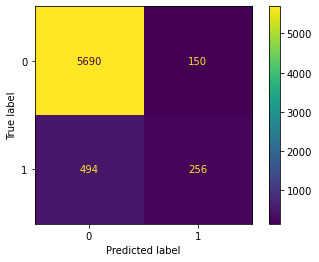

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [36]:
accuracy_score(y_test, y_pred)

0.9022761760242792

## Other Outcomes

#### Test Size: .3, Random State: 17

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.3,
                                                   random_state=17)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

C:\Users\bheuglin2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred=classifier.predict(X_test.values)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[8548  220]
 [ 737  380]]


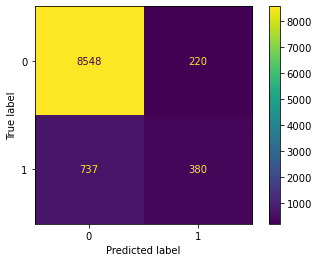

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [42]:
accuracy_score(y_test, y_pred)

0.9031866464339909

#### Test Size: .2, Random State: 23

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=23)

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

C:\Users\bheuglin2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred=classifier.predict(X_test.values)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[5723  130]
 [ 488  249]]


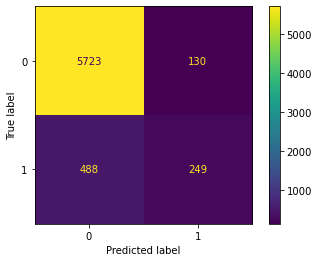

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [49]:
accuracy_score(y_test, y_pred)

0.9062215477996965

#### Test Size: .25, Random State: 23

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.25,
                                                   random_state=23)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

C:\Users\bheuglin2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred=classifier.predict(X_test.values)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[7148  166]
 [ 614  310]]


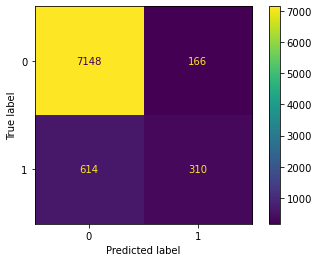

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [61]:
accuracy_score(y_test, y_pred)

0.9053168244719592

# Braden Heuglin
## DS 160 Final Project
### Spring 2023
#### Version 1